# MNIST dataset

We'll split MNIST dataset (test) and locate under the directory with label number.

file name -> `/<label#>/<offset#>`

Pytorch stores MNIST dataset under `./data/MNIST/raw/`

In [1]:
import os
import torchvision

In [2]:
torchvision.datasets.MNIST(root='./data', train=False, download=True)

0.4%

100.1%

Extracting ./data\MNIST\raw\train-images-idx3-ubyte.gz


113.5%

Extracting ./data\MNIST\raw\train-labels-idx1-ubyte.gz


100.4%

Extracting ./data\MNIST\raw\t10k-images-idx3-ubyte.gz


180.4%

Extracting ./data\MNIST\raw\t10k-labels-idx1-ubyte.gz
Processing...
Done!


Dataset MNIST
    Number of datapoints: 10000
    Split: test
    Root Location: ./data
    Transforms (if any): None
    Target Transforms (if any): None

In [3]:
base_path = './data/MNIST/raw/'
os.listdir(base_path)

['t10k-images-idx3-ubyte',
 't10k-labels-idx1-ubyte',
 'train-images-idx3-ubyte',
 'train-labels-idx1-ubyte']

In [4]:
path = os.path.join(base_path, 't10k-labels-idx1-ubyte')
print(os.stat(path).st_size)
with open(path, 'rb') as f:
    labels = list(f.read())

len(labels), labels[:12]

10008


(10008, [0, 0, 8, 1, 0, 0, 39, 16, 7, 2, 1, 0])

In [5]:
#path = os.path.join(base_path, 'data/MNIST/sorted')
path = os.path.join('./data/MNIST', 'sorted')
os.makedirs(path, exist_ok=True)
for i in range(10):
    p = os.path.join(path, str(i))
    os.makedirs(p, exist_ok=True)
sorted(os.listdir(path))

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [6]:
labels = labels[8:]
labels = [(i, l) for i, l in enumerate(labels)]
labels[:9]

[(0, 7), (1, 2), (2, 1), (3, 0), (4, 4), (5, 1), (6, 4), (7, 9), (8, 5)]

In [7]:
import numpy
import matplotlib.pyplot as plt
def show_image(x):
    x = numpy.array(list(x)).reshape(28,28)
    plt.imshow(x)

In [8]:
with open('./data/MNIST/raw/t10k-images-idx3-ubyte', 'rb') as f1:
    for i, l in labels:
        path = os.path.join('./data/MNIST/sorted', str(l), str(i))
        with open(path, 'wb') as f2:
            f1.seek(16+28*28*i, 0)
            x = f1.read(28*28)
            #show_image(x)
            f2.write(x)
            #break

Each image file is stored as below:
`./data/MNIST/sorted/<label#>/<offset#>`

You can take a label information from the path

In [9]:
#!find ./data/MNIST/sorted
! ls -al ./data/MNIST/sorted/7 | head

'ls' is not recognized as an internal or external command,
operable program or batch file.


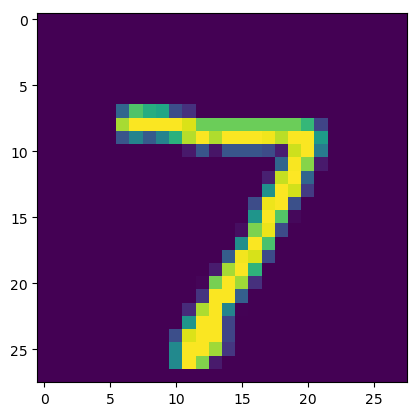

In [10]:
path = "data/MNIST/sorted/7/0"
with open(path, 'rb') as f:
    x = list(f.read())
    show_image(x)

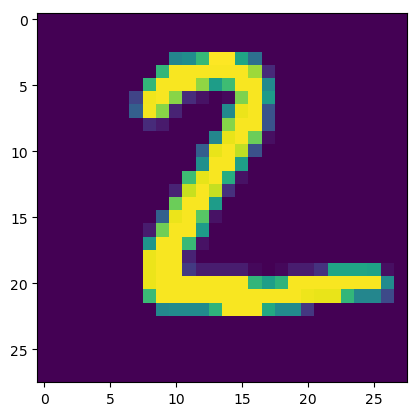

In [11]:
path = "data/MNIST/sorted/2/1"
with open(path, 'rb') as f:
    x = list(f.read())
    show_image(x)

# Run (Example)

In [12]:
!file run

'file' is not recognized as an internal or external command,
operable program or batch file.


In [1]:
# Shows each score from 0-9 in %.3f format
!run data/MNIST/sorted/7/0

'run' is not recognized as an internal or external command,
operable program or batch file.


In [19]:
# Takes multiple files
! ./run data/MNIST/sorted/7/0 data/MNIST/sorted/2/1 data/MNIST/sorted/1/2

'.' is not recognized as an internal or external command,
operable program or batch file.
